In [144]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import zscore


In [145]:
df = pd.read_csv(r"C:\Users\BAPS\Downloads\ML_test\ML_test\Food_Delivery_Times.csv")

In [146]:
df.head(10)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
5,679,19.40,Clear,Low,Evening,Scooter,8,9.0,57
6,627,9.52,Clear,Low,NaN,Bike,12,1.0,49
7,514,17.39,Clear,Medium,Evening,Scooter,5,6.0,46
8,860,1.78,Snowy,Low,Evening,Car,20,6.0,35
9,137,10.62,Foggy,Low,Evening,Scooter,29,1.0,73


In [147]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [148]:
# Here i am using one hot encoding as for every column's vlaue it will give same weightage 
categorical_cols = ["Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type"]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True,dtype=int)


In [149]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
Weather_Foggy              0
Weather_Rainy              0
Weather_Snowy              0
Weather_Windy              0
Traffic_Level_Low          0
Traffic_Level_Medium       0
Time_of_Day_Evening        0
Time_of_Day_Morning        0
Time_of_Day_Night          0
Vehicle_Type_Car           0
Vehicle_Type_Scooter       0
dtype: int64

In [150]:
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs']).mean()

In [151]:
df.isnull().sum()

Order_ID                  0
Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather_Foggy             0
Weather_Rainy             0
Weather_Snowy             0
Weather_Windy             0
Traffic_Level_Low         0
Traffic_Level_Medium      0
Time_of_Day_Evening       0
Time_of_Day_Morning       0
Time_of_Day_Night         0
Vehicle_Type_Car          0
Vehicle_Type_Scooter      0
dtype: int64

C:\Users\BAPS\AppData\Local\Temp\ipykernel_21240\1629306889.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

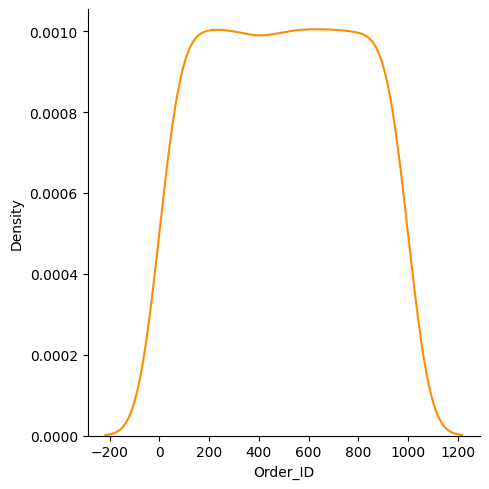

<Figure size 640x480 with 0 Axes>

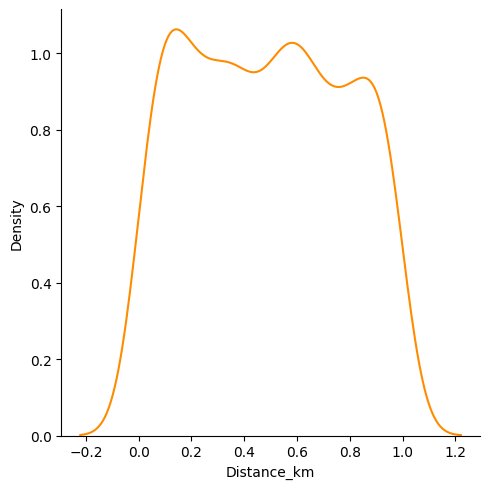

<Figure size 640x480 with 0 Axes>

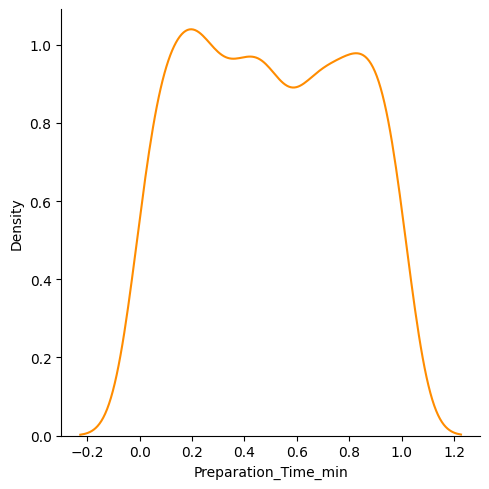

<Figure size 640x480 with 0 Axes>

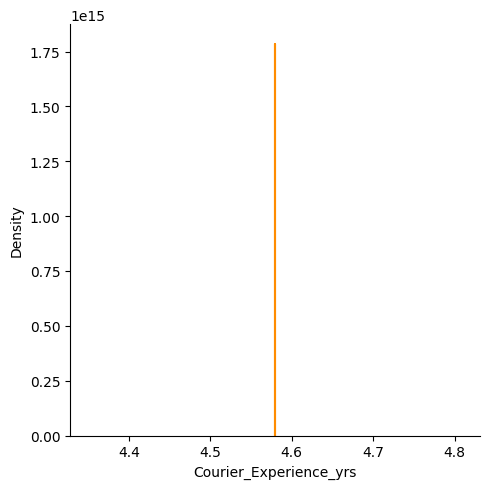

<Figure size 640x480 with 0 Axes>

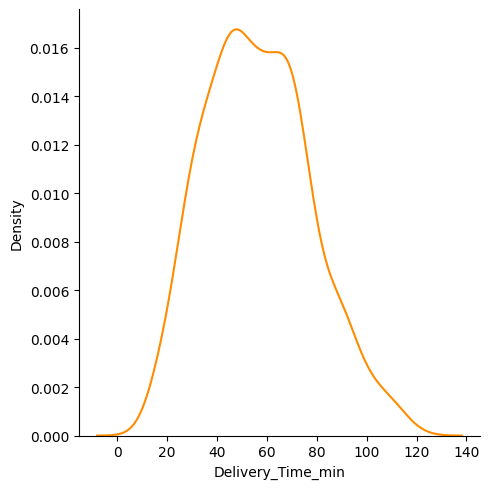

<Figure size 640x480 with 0 Axes>

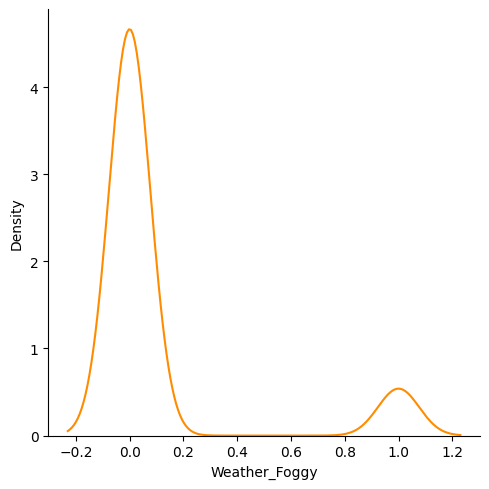

<Figure size 640x480 with 0 Axes>

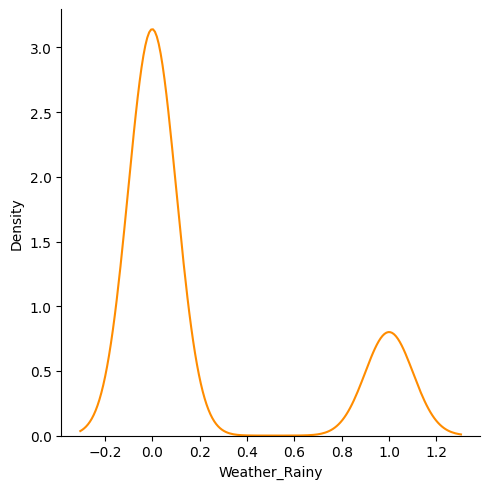

<Figure size 640x480 with 0 Axes>

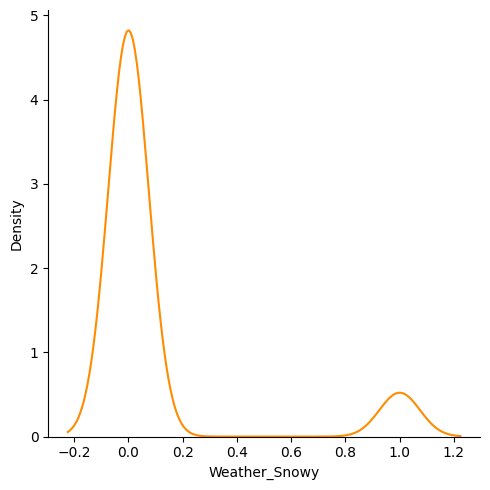

<Figure size 640x480 with 0 Axes>

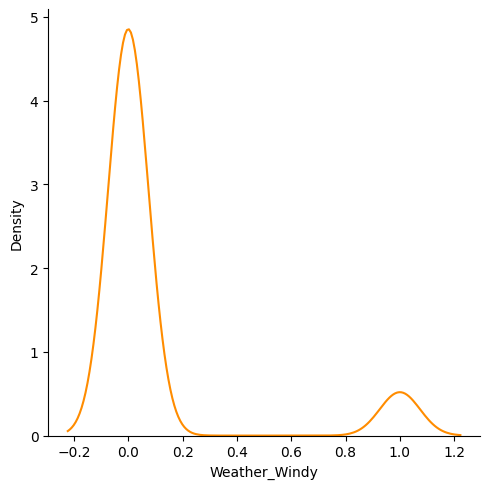

<Figure size 640x480 with 0 Axes>

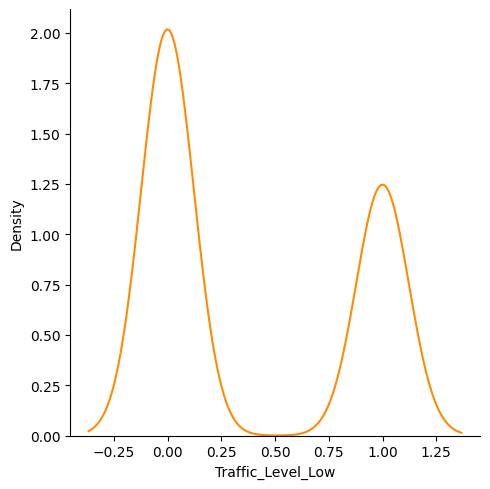

<Figure size 640x480 with 0 Axes>

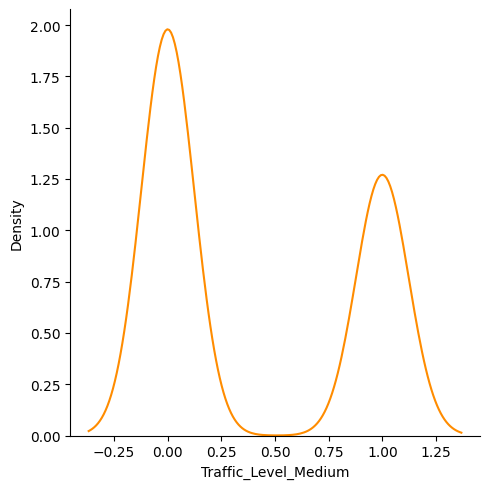

<Figure size 640x480 with 0 Axes>

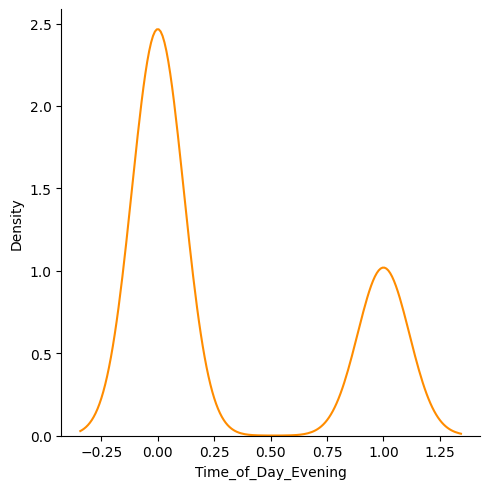

<Figure size 640x480 with 0 Axes>

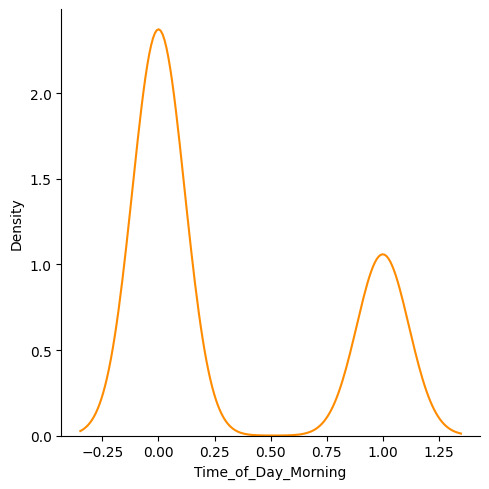

<Figure size 640x480 with 0 Axes>

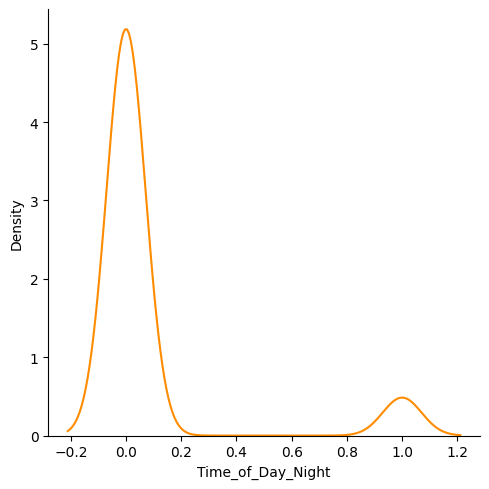

<Figure size 640x480 with 0 Axes>

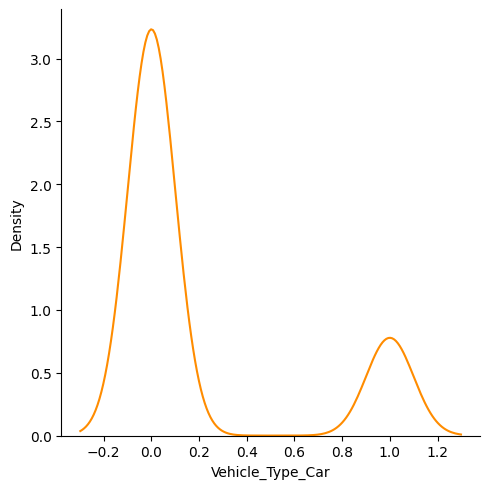

<Figure size 640x480 with 0 Axes>

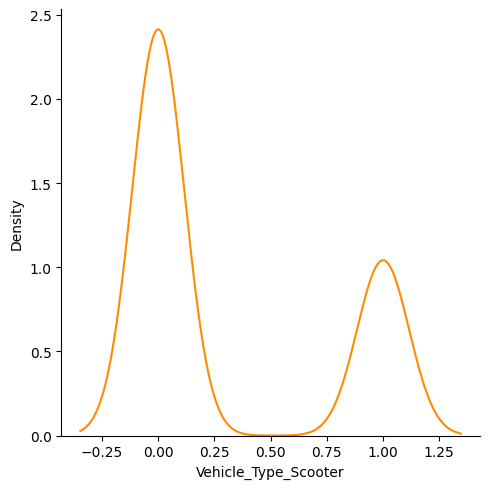

In [ ]:

for column in df.columns :
    plt.figure()
    sns.displot(df[column],color='darkorange',kind='kde')


In [152]:
df.columns

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min', 'Weather_Foggy',
       'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy', 'Traffic_Level_Low',
       'Traffic_Level_Medium', 'Time_of_Day_Evening', 'Time_of_Day_Morning',
       'Time_of_Day_Night', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter'],
      dtype='object')

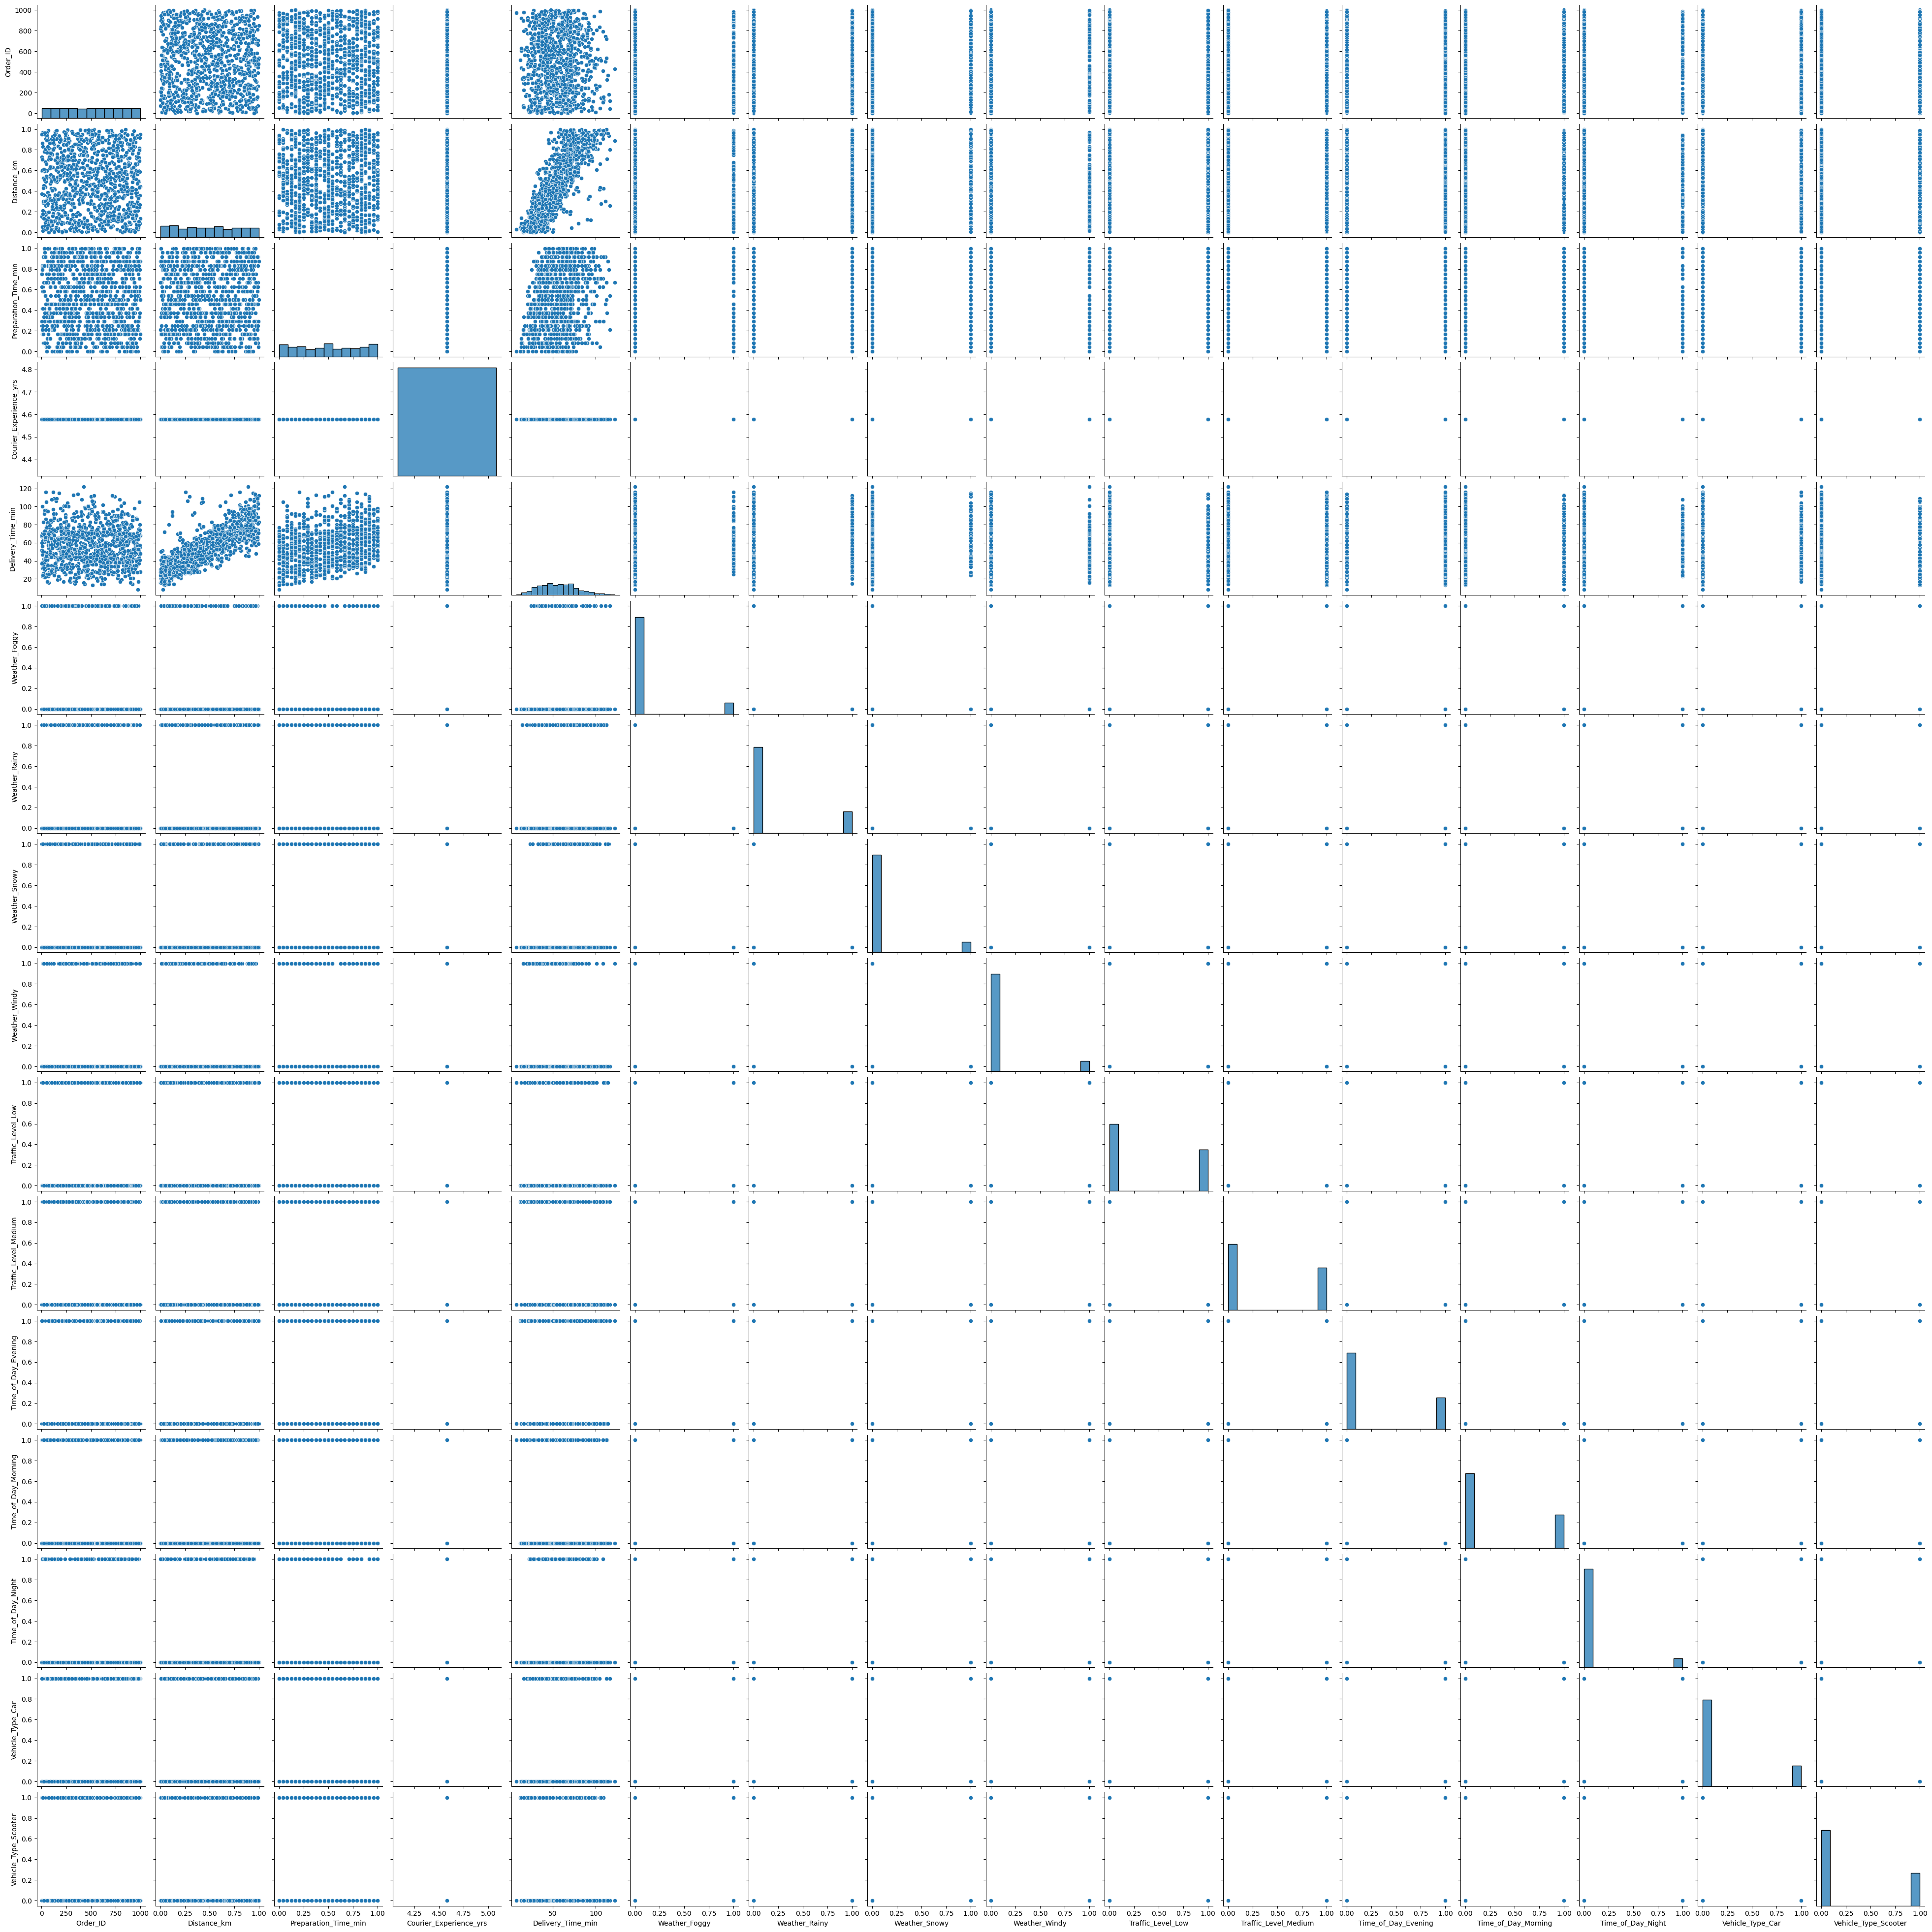

In [174]:
# Visualize relation with each independend and dependent variable
sns.pairplot(data=df)

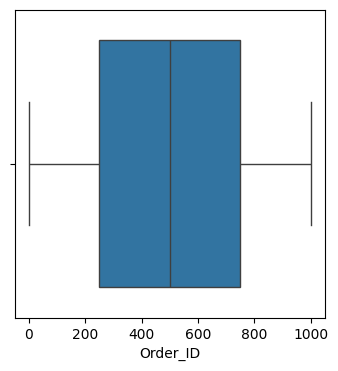

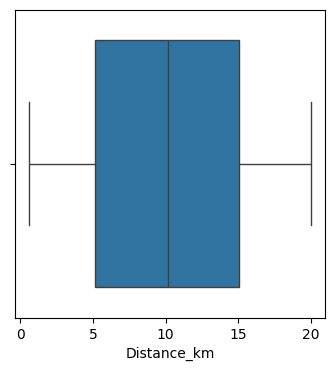

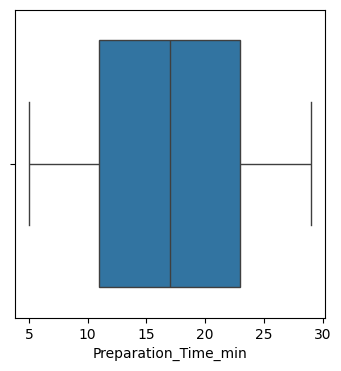

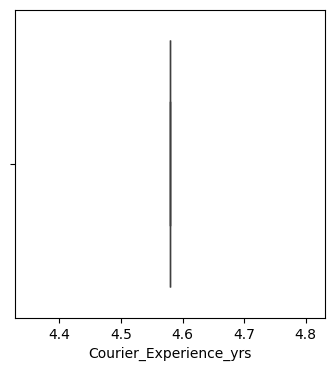

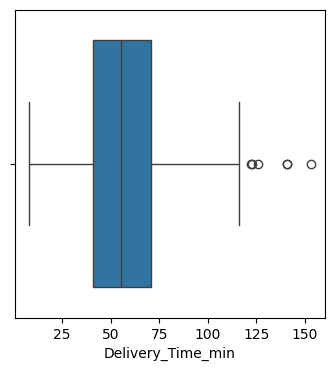

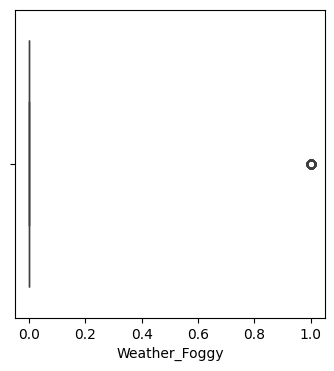

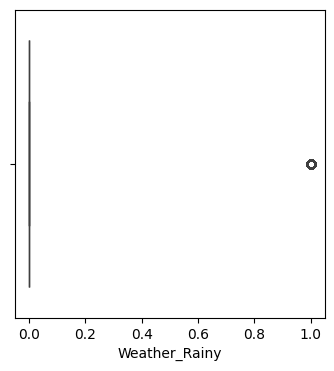

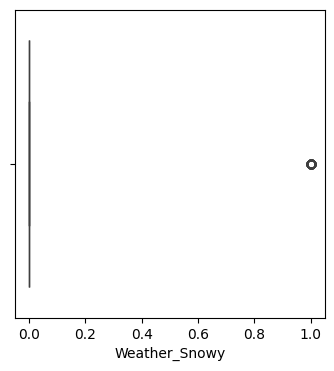

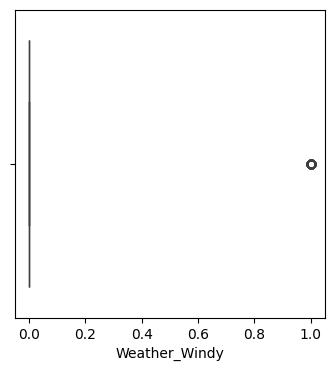

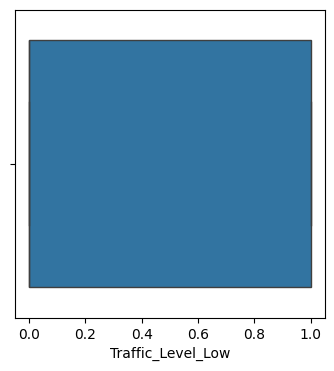

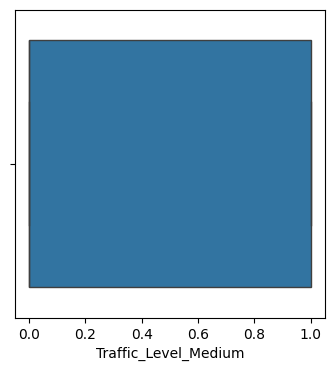

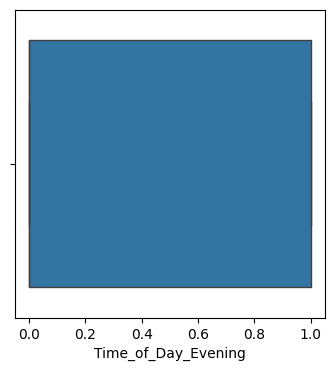

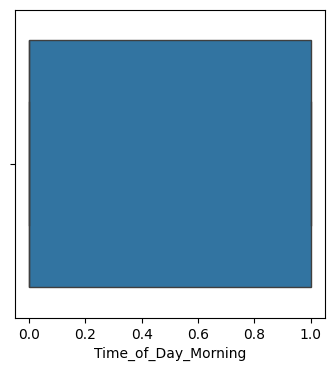

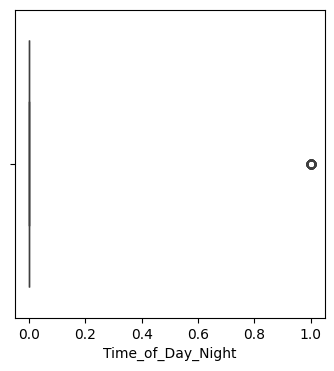

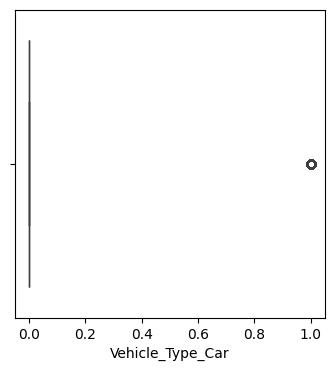

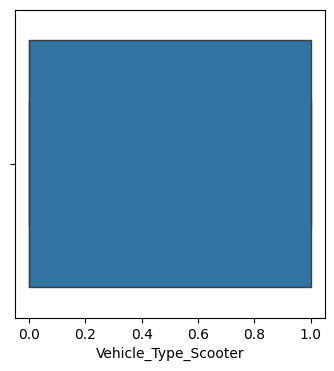

In [153]:
num = df.select_dtypes(include=np.number).columns
for col in num:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[col],data=df)

In [154]:

print('Before outlier removal : ',df.shape)
min = zscore(df['Delivery_Time_min'])

#here i am  Defining a threshold for identifying outliers
threshold = 3
 
# Find outliers only in the 'Delivery_time' column
outlier_Price = df[(np.abs(min) > threshold)]
 
print(f"\nNumber of outliers found in 'delivery_min' using a threshold of {threshold}: {len(outlier_Price)}")
# print("\n",outliers_salary)
 
# Remove outliers from the dataset
df = df[(np.abs(min) <= threshold)]
print('\nAfter Z-Score approach (outliers in Price removed) : ',df.shape)

Before outlier removal :  (1000, 16)

Number of outliers found in 'delivery_min' using a threshold of 3: 5

After Z-Score approach (outliers in Price removed) :  (995, 16)


In [155]:
num = df.select_dtypes(include='number')
skew = num.skew()
print(skew)

Order_ID                  0.000156
Distance_km               0.046702
Preparation_Time_min      0.032507
Courier_Experience_yrs    0.000000
Delivery_Time_min         0.338191
Weather_Foggy             2.606942
Weather_Rainy             1.478872
Weather_Snowy             2.718091
Weather_Windy             2.737509
Traffic_Level_Low         0.486849
Traffic_Level_Medium      0.447614
Time_of_Day_Evening       0.913845
Time_of_Day_Morning       0.830266
Time_of_Day_Night         2.970840
Vehicle_Type_Car          1.550269
Vehicle_Type_Scooter      0.866362
dtype: float64


In [156]:
kurtt = num.kurt()
print(kurtt)

Order_ID                 -1.202144
Distance_km              -1.223748
Preparation_Time_min     -1.237248
Courier_Experience_yrs    0.000000
Delivery_Time_min        -0.321674
Weather_Foggy             4.805805
Weather_Rainy             0.187436
Weather_Snowy             5.398866
Weather_Windy             5.505017
Traffic_Level_Low        -1.766533
Traffic_Level_Medium     -1.803270
Time_of_Day_Evening      -1.167237
Time_of_Day_Morning      -1.313303
Time_of_Day_Night         6.839635
Vehicle_Type_Car          0.404141
Vehicle_Type_Scooter     -1.251937
dtype: float64


In [157]:
df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,4.579381,43,0,0,0,1,1,0,0,0,0,0,1
1,738,16.42,20,4.579381,84,0,0,0,0,0,1,1,0,0,0,0
2,741,9.52,28,4.579381,59,1,0,0,0,1,0,0,0,1,0,1
3,661,7.44,5,4.579381,37,0,1,0,0,0,1,0,0,0,0,1
4,412,19.03,16,4.579381,68,0,0,0,0,1,0,0,1,0,0,0


In [158]:
df.shape

(995, 16)

<AxesSubplot: xlabel='Delivery_Time_min'>

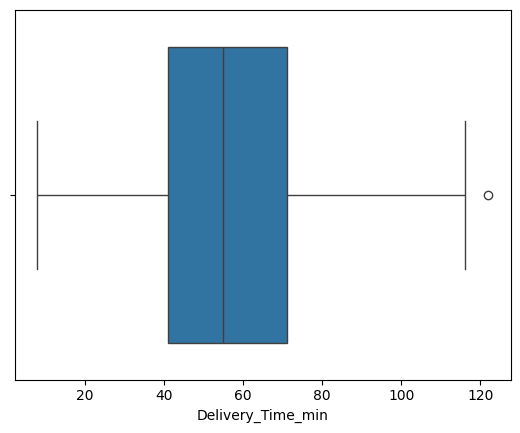

In [159]:

sns.boxplot(x=df['Delivery_Time_min'],data=df)

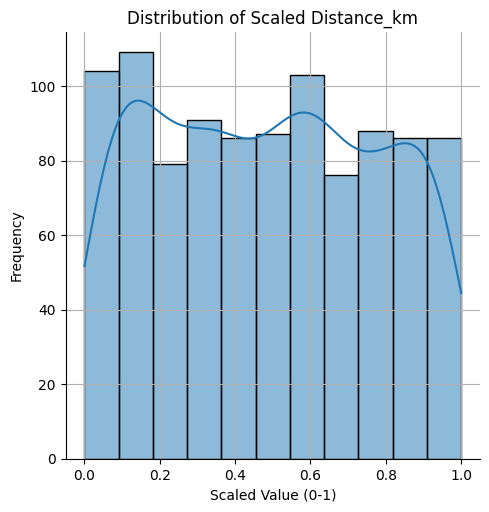

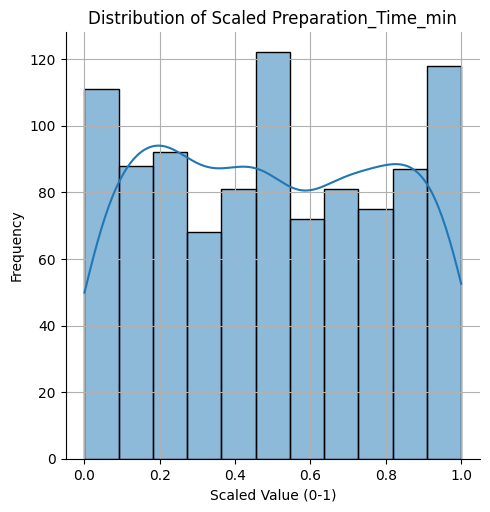

In [160]:



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler to selected features
scaler = MinMaxScaler()
df[['Distance_km', 'Preparation_Time_min']] = scaler.fit_transform(
    df[['Distance_km', 'Preparation_Time_min']]
)



# Plot distribution for each scaled feature
for col in ['Distance_km', 'Preparation_Time_min']:
    sns.displot(data=df, x=col, kde=True)
    plt.title(f'Distribution of Scaled {col}')
    plt.xlabel('Scaled Value (0-1)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



In [161]:
df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,0.378351,0.291667,4.579381,43,0,0,0,1,1,0,0,0,0,0,1
1,738,0.815979,0.625000,4.579381,84,0,0,0,0,0,1,1,0,0,0,0
2,741,0.460309,0.958333,4.579381,59,1,0,0,0,1,0,0,0,1,0,1
3,661,0.353093,0.000000,4.579381,37,0,1,0,0,0,1,0,0,0,0,1
4,412,0.950515,0.458333,4.579381,68,0,0,0,0,1,0,0,1,0,0,0


In [162]:
x = df.drop('Delivery_Time_min',axis=1)
y = df['Delivery_Time_min']

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(796, 15)
(199, 15)
(796,)
(199,)


In [165]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [166]:
y_testpred = lr_model.predict(X_test)
y_trainpred = lr_model.predict(X_train)

In [167]:
from sklearn.metrics import r2_score
print(r2_score(Y_train,y_trainpred))
print(r2_score(Y_test,y_testpred))

0.7740414610433083
0.8332575898926399


In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Example: Assuming df is your dataset
X = df.drop("Delivery_Time_min", axis=1)  # features
y = df["Delivery_Time_min"]               # target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)

# Predictions
y_pred = gbr.predict(X_test)

# Metrics
print("Gradient Boosting R²:", r2_score(y_test, y_pred))

Gradient Boosting R²: 0.7919363025843048


In [169]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define model
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],       
    "learning_rate": [0.01, 0.05, 0.1],    
    "max_depth": [3, 4, 5],                # depth of trees
    "subsample": [0.8, 1.0],              
    "colsample_bytree": [0.8, 1.0],      
    "min_child_weight": [1, 3, 5],         # min sum of instance weight in a child
    "gamma": [0, 0.1, 0.3]                 # min loss reduction for split
}

# GridSearchCV
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

# Fit
grid.fit(X_train, y_train)

# Best params and score
print("Best Parameters:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test)
print("Test R²:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1.0}
Best CV R²: 0.7304054260253906
Test R²: 0.8011930584907532


In [170]:
df1 = pd.read_csv(r"C:\Users\BAPS\Downloads\ML_test\ML_test\Food_Delivery_Times.csv")

In [171]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Features & target
X = df1.drop("Delivery_Time_min", axis=1)
y = df1["Delivery_Time_min"]

# Convert categorical features to string and handle NaN
categorical_features = ["Weather", "Traffic_Level", "Vehicle_Type", "Time_of_Day"]
for col in categorical_features:
    X[col] = X[col].astype(str).fillna("Unknown")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost
cat_model = CatBoostRegressor(
    iterations=1000,
    depth=6,
    learning_rate=0.01,
    loss_function="RMSE",
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train, cat_features=categorical_features)

# Predictions
y_pred_cat = cat_model.predict(X_test)

# Metrics
print("CatBoost R²:", r2_score(y_test, y_pred_cat))

0:	learn: 22.1248839	total: 32.5ms	remaining: 32.4s
100:	learn: 14.7281761	total: 3.62s	remaining: 32.2s
200:	learn: 12.0938768	total: 7s	remaining: 27.8s
300:	learn: 11.0084797	total: 10.2s	remaining: 23.6s
400:	learn: 10.3945109	total: 13.4s	remaining: 20s
500:	learn: 9.9992690	total: 16.2s	remaining: 16.1s
600:	learn: 9.6589907	total: 19.2s	remaining: 12.8s
700:	learn: 9.3459591	total: 22.1s	remaining: 9.41s
800:	learn: 9.0727512	total: 25s	remaining: 6.22s
900:	learn: 8.8389056	total: 27.9s	remaining: 3.07s
999:	learn: 8.6025278	total: 30.7s	remaining: 0us
CatBoost R²: 0.8048774481378055


Que:2
You have a large dataset (500,000 rows, 50 features) for predicting whether a customer will purchase a product. The data contains missing values, categorical features, outliers in numerical data, and imbalanced classes (90% non-purchasers, 10% purchasers).
Question:
How would you handle the missing data, outliers, and class imbalance before training a model, and which evaluation metrics would you prioritize to assess model performance?

In [ ]:
To handle missing data - We can either fill the missing rows when that feature is numeric by mean,ffill,median and catogorical vlaues
by mode - if the column has many large amount of  rows empty , then we can also drop the column. 

df['col'] = df['col'].fillna(df['col'].mean())
df['col'] = df['col'].fillna(df['col'].mode()[0])

df['col'] = df['col'].ffill(axis=0)
df.drop(columns=['Order_ID'],inplace=True)

To handle outliers - We can either use z_score or IQR where we give the quantile range as in zscore we cant do that so if we want to 
keep specific range of data points only that we will keep and remove outlier.
it can be easily identified by box plot and then on analses we can decide whther to keep that as the outlier or as data point. 

Thorugh IQR we give Q1 AND Q3 range and it will take only that data point and remove the outliers . 
or we can go with zscore where we give the thresold that is basically 3 (df = df[(np.abs(min) <= threshold)]).BaseException

To handle imbalanced data - we can do use smote to balance the imbalanced classes (90% non-purchasers, 10% purchasers).We can either
add more rows of purchases or we can remove  rows of non_purchases as they are too many rows so we can balance the data.


which evaluation metrics would you prioritize to assess model performance?
As it is classfication data that whether the person will buy or not buy the product we can use  accuracy_score and on testing publish_display_data
it predicts the score.



SyntaxError: invalid syntax. Perhaps you forgot a comma? (1073871586.py, line 1)

 
Que:3
You’re tasked with segmenting 100,000 customers based on their purchasing behavior across various categories (electronics, fashion, home goods, etc.). The data includes both numerical and categorical features.
Question:
Which clustering algorithm would you choose for this dataset, and how would you determine the optimal number of clusters?


In [ ]:
If we have 100,000 customers we can use DBSCAN . It has 2 parameters epsilon and min_samples.
To find the best epsilon we can use NearestNeighbours , there we can set nearest neighbours and make a plot of 
Distance to n nearest neighbor and Points sorted by distance. Wherever there is the elbow forming we take that epislon value 
and we take min_samples whih ever coniation is givng best clusters we choose it . 

And here we dont need to give how many clusters we want , it will automatically decide the clusters.As in kmeans we have to decide it 
by plotting the  elbow  and slithouse graph and chck the elbow or wherever the slithouse score is more that many clusters we will habe.

Better for large amt of data and works on both numerical and categorical features. 



